**Задание 5. Построение фазового портрета аттрактора Лоренца (3 порядок)**

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#задание системы ОДУ третьего порядка
def ode(y, t, sigma, r, b):
        x,y,z = y
        dxdt = sigma * (y-x)
        dydt = x * (r - z) - y
        dzdt = x*y - b*z
        return [dxdt, dydt, dzdt]

#получение решения ОДУ
def calcODE(args, x, y, z, ts = 10, nt = 101):
    '''
    x, y, z — начальные условия для первой переменной состояния,
    ts — длительность решения,
    nt — число шагов в решении (время интегрирования * шаг времени)
    '''
    y0 = [x, y, z]
    #формирование вектора временных отсчетов от 0 до ts и общ nt
    t = np.linspace(0, ts, nt)
    #решение ОДУ
    sol = odeint(ode, y0, t, args)
    return sol

#отрисовка фазового портрета
def drawPhasePortrait3D(args,
                        deltaX = 1, deltaY = 1, deltaZ = 1,
                        startX = 0,  stopX = 5,
                        startY = 0, stopY = 5,
                        startZ = 0, stopZ = 5,
                        ts = 10, nt = 101):
    '''
    delta$ — шаг начальных условий по горизонтальной оси (переменной состояния),
    start$ — начальное значение интервала начальных условий,
    stop$ — конечное значение интервала начальных условий,
    ts — длительность решения,
    nt — число шагов в решении (время интегрирования * шаг времени)
    '''

    fig = plt.figure()
    ax = fig.add_subplot(2, 2, 1, projection='3d')
    ax.set_title("3D")
    plt.subplot(2, 2, 2)
    plt.title("X-Y")
    plt.grid()
    plt.subplot(2, 2, 3)
    plt.title("X-Z")
    plt.grid()
    plt.subplot(2, 2, 4)
    plt.title("Y-Z")
    plt.grid()

    for x in range(startX, stopX, deltaX):
        for y in range(startY, stopY, deltaY):
                for z in range(startZ, stopZ, deltaZ):
                    sol = calcODE(args, x, y, z, ts, nt)

                    ax.plot(sol[:, 0], sol[:, 1], sol[:, 2])
                    plt.subplot(2, 2, 2)
                    plt.plot(sol[:, 0], sol[:, 1])
                    plt.subplot(2, 2, 3)
                    plt.plot(sol[:, 0], sol[:, 2])
                    plt.subplot(2, 2, 4)
                    plt.plot(sol[:, 1], sol[:, 2])


    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

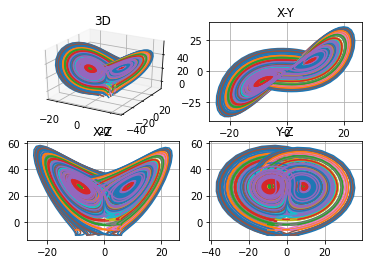

In [ ]:
sigma = 10
r = 28
b = 8/3

args=(sigma, r, b)

drawPhasePortrait3D(args,
                        deltaX = 4, deltaY = 4, deltaZ = 4,
                        startX = -10,  stopX = 10,
                        startY = -10, stopY = 10,
                        startZ = -10, stopZ = 10,
                        ts = 10, nt = 1001)